# Analyse of Gephi presence on Github

In [55]:
import pickle
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt


## Collect data on github

See the script of Lasse :

https://github.com/watchforest/pygithub-search/blob/main/PyGithub%20Search%20and%20Retrieve.ipynb

In [123]:
df = pd.read_csv("./Data/gephi_repositories.csv")
print(df.shape)
df["watchers"] = df["watchers"].apply(eval)
df["stargazers"] = df["stargazers"].apply(eval)
df["contributors"] = df["contributors"].apply(eval)
df["commits"] = df["commits"].apply(eval)
df["active"] = (df["commits"].apply(sum)>0)


df.columns

Index(['Unnamed: 0', 'id', 'fullname', 'name', 'owner', 'website', 'forks',
       'createdAt', 'updatedAt', 'commits', 'topics', 'watchers', 'stargazers',
       'contributors', 'readme'],
      dtype='object')

## Distributions

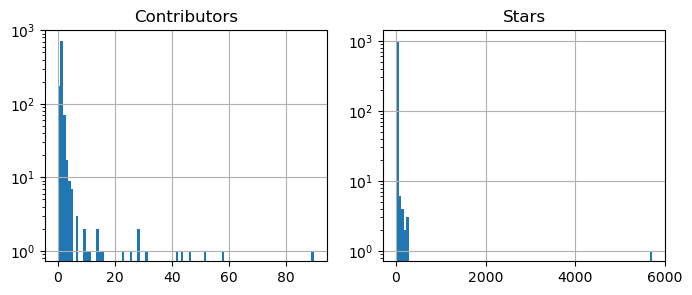

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))
df["contributors"].apply(len).hist(bins=100, ax=ax[0])
ax[0].set_title("Contributors")
ax[0].set_yscale('log')

df["stargazers"].apply(len).hist(bins=100, ax=ax[1])
ax[1].set_title("Stars")
ax[1].set_yscale('log')

## Build network of users/repository to visualize the community

In [116]:
reseau = nx.Graph()

individuals = "watchers"

for i,row in df[df["active"]==1].iterrows():
    reseau.add_node(row["fullname"], weight=len(row[individuals]), cat="repository")
    for w in row[individuals]:
        if not reseau.has_node(w):
            reseau.add_node(w, weight=0, cat="account")
        reseau.nodes[w]["weight"]+=1
        reseau.add_edge(row["fullname"], w, weight=1)
    
print(reseau)

Graph with 6369 nodes and 6455 edges


In [102]:
from ipysigma import Sigma

nodes_to_keep = [n for n, attr in reseau.nodes(data=True) if attr.get('weight', 0) > 1]
sub =  reseau.subgraph(nodes_to_keep).copy()
Sigma(reseau, node_size="weight", node_color="cat")

Sigma(nx.Graph with 6,369 nodes and 6,455 edges)